In [1]:
import sys
print(sys.executable)

/opt/conda/bin/python


In [2]:
## Basics
import numpy as np
import pandas as pd
import re
import datetime as dt
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

## Regression using scikit-learn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder, scale, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

## Setup
warnings.filterwarnings('ignore') 
plt.style.use(['seaborn-pastel'])
%matplotlib inline
%autosave 10

Autosaving every 10 seconds


In [3]:
beijing = pd.read_csv("data/beijing.csv", parse_dates=["tradeTime"], encoding='gb2312')
print(beijing.columns.values)
beijing.head()

['url' 'id' 'Lng' 'Lat' 'Cid' 'tradeTime' 'DOM' 'followers' 'totalPrice'
 'price' 'square' 'livingRoom' 'drawingRoom' 'kitchen' 'bathRoom' 'floor'
 'buildingType' 'constructionTime' 'renovationCondition'
 'buildingStructure' 'ladderRatio' 'elevator' 'fiveYearsProperty' 'subway'
 'district' 'communityAverage']


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [4]:
beijing.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [5]:
beijing.drop("Cid", axis = 1, inplace=True)
beijing.drop("id", axis = 1, inplace=True)
beijing.drop("url", axis = 1, inplace=True)
beijing.drop("price", axis = 1, inplace=True)

In [6]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Lng                  318851 non-null  float64       
 1   Lat                  318851 non-null  float64       
 2   tradeTime            318851 non-null  datetime64[ns]
 3   DOM                  160874 non-null  float64       
 4   followers            318851 non-null  int64         
 5   totalPrice           318851 non-null  float64       
 6   square               318851 non-null  float64       
 7   livingRoom           318851 non-null  object        
 8   drawingRoom          318851 non-null  object        
 9   kitchen              318851 non-null  int64         
 10  bathRoom             318851 non-null  object        
 11  floor                318851 non-null  object        
 12  buildingType         316830 non-null  float64       
 13  constructionTi

## Data cleaning

#### Cleaning factor variables

In [7]:
for row in range(beijing.shape[1]):
    if(beijing.iloc[:,row].dtype=="O"):
        print("{}: {}".format(beijing.columns[row],beijing.iloc[:,row].unique()))

livingRoom: [2 3 1 4 5 6 9 0 7 8 '1' '4' '3' '2' '5' '7' '9' '6' '0' '#NAME?' '8']
drawingRoom: [1 2 0 4 3 5 '0' '1' '2' '3' '4' '中 14' '中 15' '中 16' '中 6' '高 14' '顶 6'
 '低 6' '低 16' '高 12' '低 15' '5' '高 6' '底 28' '底 11' '中 24' '底 20' '中 22']
bathRoom: [1 2 3 0 4 5 6 7 2006 2003 1990 2000 1996 2005 2011 '1' '2' '0' '3' '4'
 '5' '未知' 1994 2004 '2003' '7']
floor: ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低 12' '中 10' '中 16' '顶 20' '底 19' '中 31' '低 13'
 '底 10' '高 25' '中 21' '中 20' '高 20' '低 21' '低 24' '顶 4' '高 21' '高 7'
 '中 22' '底 1' '中 7' '底 8' '顶 15' '中 18' '高 28' '顶 14' '顶 13'

In [8]:
beijing.iloc[:,11] = np.array(beijing.iloc[:,11].str.extract("([0-9]+)")).reshape(-1,1)

In [9]:
sel = [7,8,10,11,13]
for s in sel:
    beijing.iloc[:,s] = pd.to_numeric(beijing.iloc[:,s], errors='coerce')

#### Removing missing values

In [10]:
beijing.isna().mean()*100

Lng                     0.000000
Lat                     0.000000
tradeTime               0.000000
DOM                    49.545713
followers               0.000000
totalPrice              0.000000
square                  0.000000
livingRoom              0.010036
drawingRoom             0.010036
kitchen                 0.000000
bathRoom                0.000627
floor                   0.010036
buildingType            0.633838
constructionTime        6.047652
renovationCondition     0.000000
buildingStructure       0.000000
ladderRatio             0.000000
elevator                0.010036
fiveYearsProperty       0.010036
subway                  0.010036
district                0.000000
communityAverage        0.145209
dtype: float64

Understanding distribution of DOM column

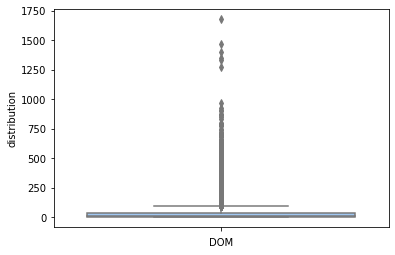

In [11]:
plt.clf()
sns.boxplot(y = beijing["DOM"])
plt.xlabel("DOM")
plt.ylabel("distribution")
plt.show()

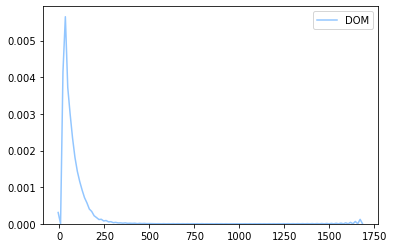

In [12]:
plt.clf()
sns.kdeplot(data = beijing.loc[:,"DOM"])
plt.show()

In [13]:
beijing["DOM"].quantile([0.25,0.5,0.75,1])

0.25       1.0
0.50       6.0
0.75      37.0
1.00    1677.0
Name: DOM, dtype: float64

Majority of the data sits outside the upper whiskers, we impute the missing values using the median

In [14]:
beijing["DOM"] = beijing["DOM"].fillna(beijing["DOM"].median())

Removing the other records from the dataset having missing values

In [15]:
beijing.dropna(axis = 0, how = "any", inplace = True)

In [16]:
beijing = beijing.astype({"DOM":"int64","livingRoom":"int64","drawingRoom":"int64","bathRoom":"int64","floor":"int64",
                          "buildingType":"O","constructionTime":"int64","renovationCondition":"O","buildingStructure":"O",
                          "elevator":"O", "fiveYearsProperty":"O","subway":"O","district":"O"}, errors = 'ignore')

In [17]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297701 entries, 0 to 318849
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Lng                  297701 non-null  float64       
 1   Lat                  297701 non-null  float64       
 2   tradeTime            297701 non-null  datetime64[ns]
 3   DOM                  297701 non-null  int64         
 4   followers            297701 non-null  int64         
 5   totalPrice           297701 non-null  float64       
 6   square               297701 non-null  float64       
 7   livingRoom           297701 non-null  int64         
 8   drawingRoom          297701 non-null  int64         
 9   kitchen              297701 non-null  int64         
 10  bathRoom             297701 non-null  int64         
 11  floor                297701 non-null  int64         
 12  buildingType         297701 non-null  object        
 13  constructionTi

Moving response feature to the right end of the dataframe

In [18]:
feature_df = beijing.drop("totalPrice", axis = 1)
response_df = beijing["totalPrice"]
beijing = feature_df.merge(response_df, left_index = True, right_index = True)
beijing.head()

,Lng,Lat,tradeTime,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,totalPrice
0,116.475489,40.019520,2016-08-09,1464,106,131.00,2,1,1,1,...,2005,3,6,0.217,1,0,1,7,56021.0,415.0
1,116.453917,39.881534,2016-07-28,903,126,132.38,2,2,1,2,...,2004,4,6,0.667,1,1,0,7,71539.0,575.0
2,116.561978,39.877145,2016-12-11,1271,48,198.00,3,2,1,3,...,2005,3,6,0.500,1,0,0,7,48160.0,1030.0
3,116.438010,40.076114,2016-09-30,965,138,134.00,3,1,1,1,...,2008,1,6,0.273,1,0,0,6,51238.0,297.5
4,116.428392,39.886229,2016-08-28,927,286,81.00,2,1,1,1,...,1960,2,2,0.333,0,1,1,1,62588.0,392.0


#### Correcting factor labels

In [19]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297701 entries, 0 to 318849
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Lng                  297701 non-null  float64       
 1   Lat                  297701 non-null  float64       
 2   tradeTime            297701 non-null  datetime64[ns]
 3   DOM                  297701 non-null  int64         
 4   followers            297701 non-null  int64         
 5   square               297701 non-null  float64       
 6   livingRoom           297701 non-null  int64         
 7   drawingRoom          297701 non-null  int64         
 8   kitchen              297701 non-null  int64         
 9   bathRoom             297701 non-null  int64         
 10  floor                297701 non-null  int64         
 11  buildingType         297701 non-null  object        
 12  constructionTime     297701 non-null  int64         
 13  renovationCond

In [20]:
print("Shape of dataframe:    {}".format(beijing.shape))
print(beijing.apply(lambda x: x.unique()))

Shape of dataframe:    (297701, 22)
Lng                    [116.475489, 116.45391699999999, 116.561978, 1...
Lat                    [40.01952, 39.881534, 39.877145, 40.0761140000...
tradeTime              [2016-08-09T00:00:00.000000000, 2016-07-28T00:...
DOM                    [1464, 903, 1271, 965, 927, 861, 851, 904, 873...
followers              [106, 126, 48, 138, 286, 57, 167, 218, 134, 74...
square                 [131.0, 132.38, 198.0, 134.0, 81.0, 53.0, 73.0...
livingRoom                                   [2, 3, 1, 4, 5, 6, 0, 7, 8]
drawingRoom                                           [1, 2, 0, 4, 3, 5]
kitchen                                                     [1, 0, 2, 3]
bathRoom                                        [1, 2, 3, 0, 4, 5, 6, 7]
floor                  [26, 22, 4, 21, 6, 8, 10, 23, 11, 24, 19, 18, ...
buildingType                                        [1.0, 4.0, 3.0, 2.0]
constructionTime       [2005, 2004, 2008, 1960, 1997, 2009, 1991, 200...
renovationCondi

In [21]:
beijing = beijing.apply(lambda x: x.astype("int64") if(x.dtype =="O") else x)

In [22]:
buildingType = {
    1:"Tower",
    2:"Bunglow",
    3:"Plate/Tower",
    4:"Plate"
}
renovationCondition = {
    1:"Other",
    2:"Rough",
    3:"Simplicity",
    4:"Hardcover"
}
buildingStructure = {
    1:"Unavailable",
    2:"Mixed",
    3:"Brick/Wood",
    4:"Brick/Concrete",
    5:"Steel",
    6:"Steel/Concrete"
}
elevator = {
    1:"Present",
    0:"Absent"
}
subway = {
    1:"Nearby",
    0:"Far"
}
fiveYearProperty = {
    1:"Ownership<5y",
    0:"Ownership>5y"
}
district = {
    1 : "DongCheng",
    2 : "FengTai",
    3 : "DaXing",
    4 : "FaXing",
    5 : "FangShang",
    6 : "ChangPing",
    7 : "ChaoYang",
    8 : "HaiDian",
    9 : "ShiJingShan",
    10 : "XiCheng",
    11 : "TongZhou",
    12 : "ShunYi",
    13 : "MenTouGou"
}
correct_label = {
    11:buildingType,
    13:renovationCondition,
    14:buildingStructure,
    16:elevator,
    17:fiveYearProperty,
    18:subway,
    19:district
}

In [23]:
for key,val in correct_label.items():
    print(key,val)

11 {1: 'Tower', 2: 'Bunglow', 3: 'Plate/Tower', 4: 'Plate'}
13 {1: 'Other', 2: 'Rough', 3: 'Simplicity', 4: 'Hardcover'}
14 {1: 'Unavailable', 2: 'Mixed', 3: 'Brick/Wood', 4: 'Brick/Concrete', 5: 'Steel', 6: 'Steel/Concrete'}
16 {1: 'Present', 0: 'Absent'}
17 {1: 'Ownership<5y', 0: 'Ownership>5y'}
18 {1: 'Nearby', 0: 'Far'}
19 {1: 'DongCheng', 2: 'FengTai', 3: 'DaXing', 4: 'FaXing', 5: 'FangShang', 6: 'ChangPing', 7: 'ChaoYang', 8: 'HaiDian', 9: 'ShiJingShan', 10: 'XiCheng', 11: 'TongZhou', 12: 'ShunYi', 13: 'MenTouGou'}


In [24]:
for key,val in correct_label.items():
    beijing.iloc[:,key] = beijing.iloc[:,key].replace(val)

In [25]:
print(beijing.shape,beijing.apply(lambda x: x.unique()))

(297701, 22) Lng                    [116.475489, 116.45391699999999, 116.561978, 1...
Lat                    [40.01952, 39.881534, 39.877145, 40.0761140000...
tradeTime              [2016-08-09T00:00:00.000000000, 2016-07-28T00:...
DOM                    [1464, 903, 1271, 965, 927, 861, 851, 904, 873...
followers              [106, 126, 48, 138, 286, 57, 167, 218, 134, 74...
square                 [131.0, 132.38, 198.0, 134.0, 81.0, 53.0, 73.0...
livingRoom                                   [2, 3, 1, 4, 5, 6, 0, 7, 8]
drawingRoom                                           [1, 2, 0, 4, 3, 5]
kitchen                                                     [1, 0, 2, 3]
bathRoom                                        [1, 2, 3, 0, 4, 5, 6, 7]
floor                  [26, 22, 4, 21, 6, 8, 10, 23, 11, 24, 19, 18, ...
buildingType                        [Tower, Plate, Plate/Tower, Bunglow]
constructionTime       [2005, 2004, 2008, 1960, 1997, 2009, 1991, 200...
renovationCondition                [Si

In [26]:
beijing = beijing.astype({"livingRoom":"O","drawingRoom":"O","bathRoom":"O","kitchen":"O"}, errors = 'ignore')

In [27]:
beijing.reset_index(inplace=True, drop = True)

## Understanding the data

In [28]:
names = beijing.columns
cat_idx = []
num_idx = []
for i in range(20):
    column = beijing.iloc[:,i]
    if(column.dtype=="O"):
        cat_idx.append(i)
        print("{}\nUnique values:\n{}\n".format(names[i],column.unique()))
    elif(column.dtype!='<M8[ns]'):
        num_idx.append(i)

livingRoom
Unique values:
[2 3 1 4 5 6 0 7 8]

drawingRoom
Unique values:
[1 2 0 4 3 5]

kitchen
Unique values:
[1 0 2 3]

bathRoom
Unique values:
[1 2 3 0 4 5 6 7]

buildingType
Unique values:
['Tower' 'Plate' 'Plate/Tower' 'Bunglow']

renovationCondition
Unique values:
['Simplicity' 'Hardcover' 'Other' 'Rough']

buildingStructure
Unique values:
['Steel/Concrete' 'Mixed' 'Brick/Concrete' 'Steel' 'Brick/Wood'
 'Unavailable']

elevator
Unique values:
['Present' 'Absent']

fiveYearsProperty
Unique values:
['Ownership>5y' 'Ownership<5y']

subway
Unique values:
['Nearby' 'Far']

district
Unique values:
['ChaoYang' 'ChangPing' 'DongCheng' 'MenTouGou' 'XiCheng' 'FengTai'
 'HaiDian' 'FaXing' 'FangShang' 'DaXing' 'ShiJingShan' 'ShunYi' 'TongZhou']



<Figure size 432x288 with 0 Axes>

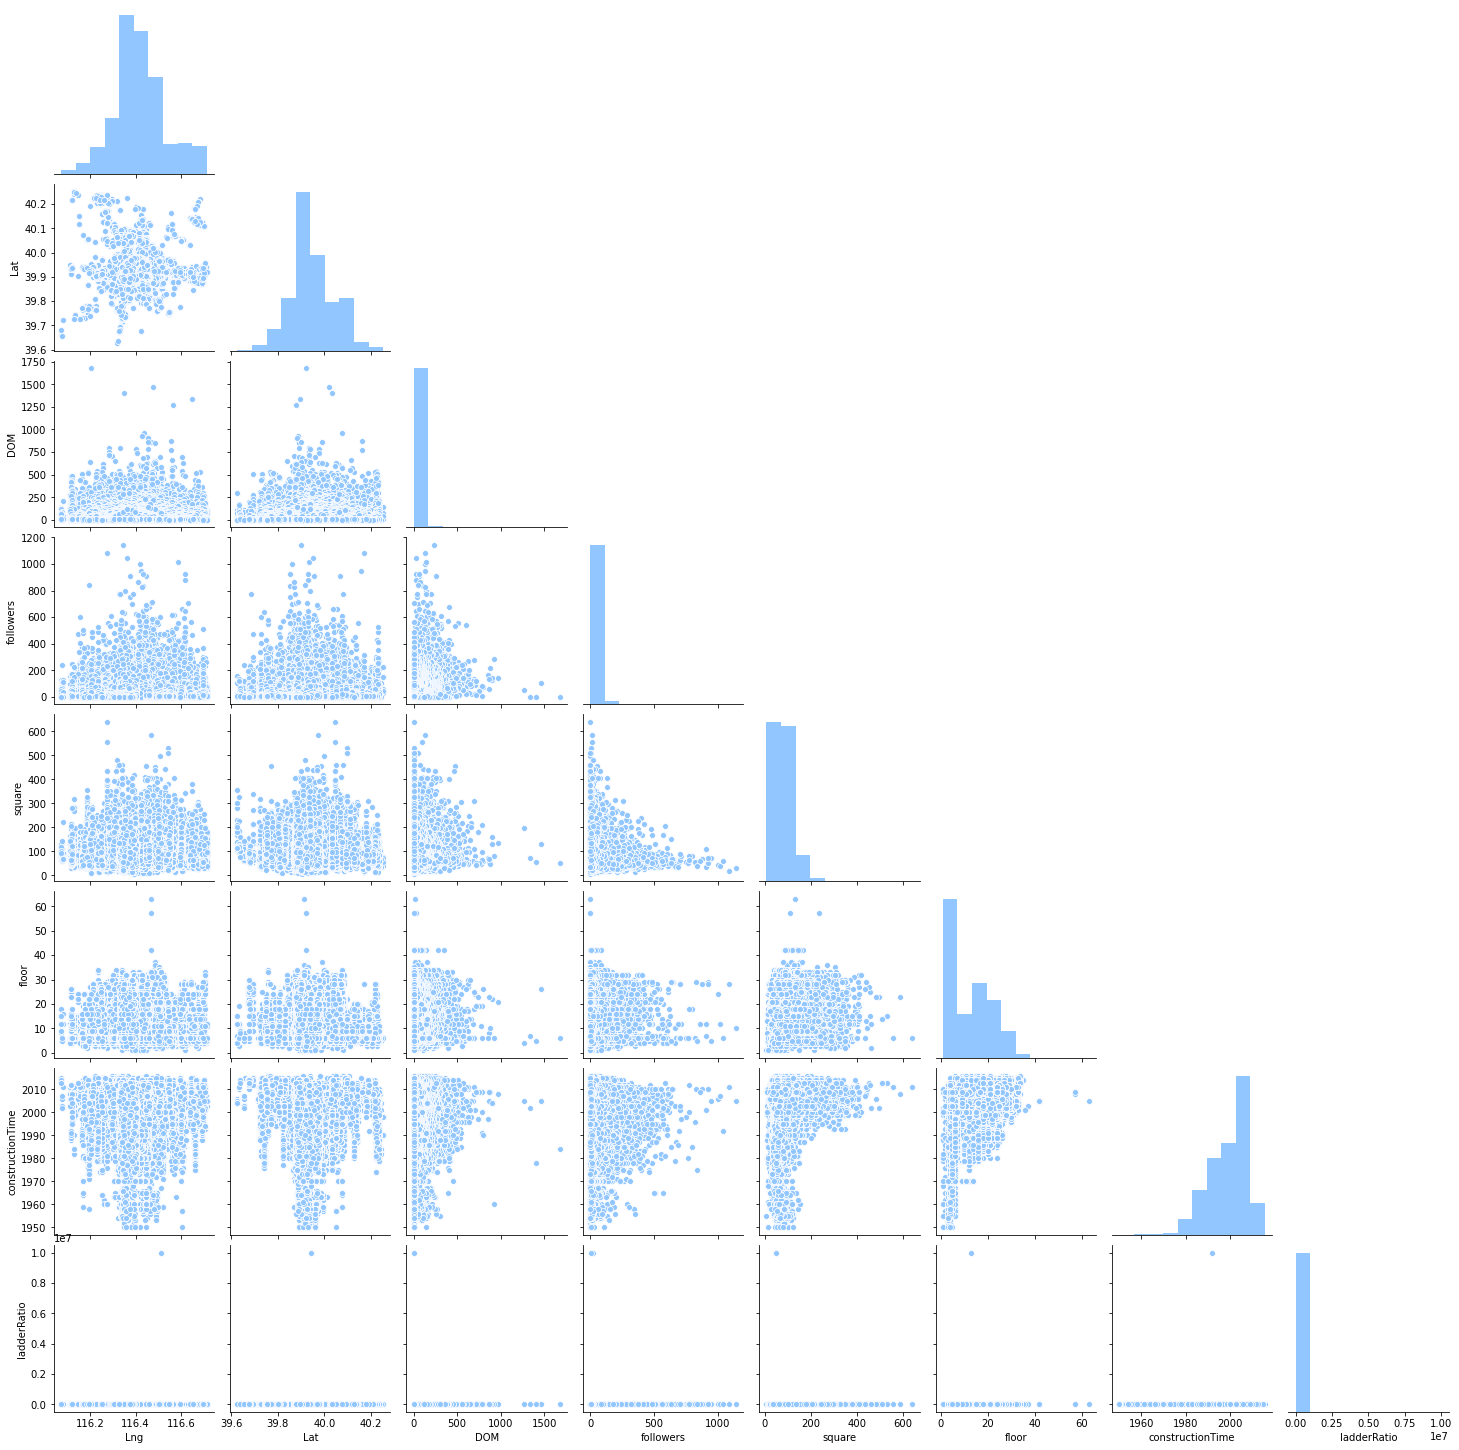

In [29]:
plt.clf()
sns.pairplot(beijing.iloc[:,num_idx], corner=True)
plt.show()

In [30]:
beijing.iloc[:,num_idx[2:]].describe()

,DOM,followers,square,floor,constructionTime,ladderRatio
count,297701.000000,297701.000000,297701.000000,297701.000000,297701.000000,2.977010e+05
mean,17.985237,17.169667,82.681580,13.166200,1999.197799,6.762655e+01
std,37.881615,34.740228,35.730446,7.761751,8.763049,2.594371e+04
min,1.000000,0.000000,7.370000,1.000000,1950.000000,1.400000e-02
25%,6.000000,0.000000,57.930000,6.000000,1994.000000,2.500000e-01
50%,6.000000,5.000000,74.000000,11.000000,2001.000000,3.330000e-01
75%,8.000000,19.000000,98.320000,19.000000,2006.000000,5.000000e-01
max,1677.000000,1143.000000,640.000000,63.000000,2016.000000,1.000940e+07


In [31]:
beijing.iloc[:,cat_idx].describe()

,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,elevator,fiveYearsProperty,subway,district
count,297701,297701,297701,297701,297701,297701,297701,297701,297701,297701,297701
unique,9,6,4,8,4,4,6,2,2,2,13
top,2,1,1,1,Plate,Hardcover,Steel/Concrete,Present,Ownership<5y,Nearby,ChaoYang
freq,151560,213122,294602,245332,164772,109609,173346,169902,193956,179223,101139


In [32]:
temp = beijing["totalPrice"].groupby(beijing["district"]).agg([np.mean,np.min,np.max,np.median])
temp

,mean,amin,amax,median
district,,,,
ChangPing,280.466645,0.1,1900.0,260.0
ChaoYang,366.733546,0.1,4900.0,305.0
DaXing,286.382851,0.1,1230.0,239.0
DongCheng,441.111142,0.1,3190.0,385.0
FaXing,255.671612,0.1,1350.0,225.0
FangShang,254.710031,18.5,880.0,239.0
FengTai,300.158926,0.1,1550.0,261.0
HaiDian,431.151246,0.1,4475.0,368.0
MenTouGou,221.205904,0.1,2169.0,188.0


## Saving the cleaned dataset

In [33]:
beijing.drop("Lat", axis = 1, inplace=True)
beijing.drop("Lng", axis = 1, inplace=True)

In [34]:
beijing.to_csv('cleaned_beijing.csv')

## Preprocessing

In [35]:
print(beijing.isnull().sum())
print("\n")
print(beijing.info())

tradeTime              0
DOM                    0
followers              0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
totalPrice             0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297701 entries, 0 to 297700
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   tradeTime            297701 non-null  datetime64[ns]
 1   DOM                  297701 non-null  int64         
 2   followers            297701 non-null  int64         
 3   square               297701 non-null  float64       
 4   livingRoom           

In [36]:
r_beijing = pd.get_dummies(beijing)
r_beijing['tradeTime'] = pd.to_datetime(r_beijing['tradeTime'] )
r_beijing['tradeTime'] = r_beijing['tradeTime'] .map(dt.datetime.toordinal)
feature_df = r_beijing.drop("totalPrice", axis = 1)
response_df = r_beijing["totalPrice"]
r_beijing = feature_df.merge(response_df, left_index = True, right_index = True)
r_beijing.head()

,tradeTime,DOM,followers,square,floor,constructionTime,ladderRatio,communityAverage,livingRoom_0,livingRoom_1,...,district_FaXing,district_FangShang,district_FengTai,district_HaiDian,district_MenTouGou,district_ShiJingShan,district_ShunYi,district_TongZhou,district_XiCheng,totalPrice
0,736185,1464,106,131.00,26,2005,0.217,56021.0,0,0,...,0,0,0,0,0,0,0,0,0,415.0
1,736173,903,126,132.38,22,2004,0.667,71539.0,0,0,...,0,0,0,0,0,0,0,0,0,575.0
2,736309,1271,48,198.00,4,2005,0.500,48160.0,0,0,...,0,0,0,0,0,0,0,0,0,1030.0
3,736237,965,138,134.00,21,2008,0.273,51238.0,0,0,...,0,0,0,0,0,0,0,0,0,297.5
4,736204,927,286,81.00,6,1960,0.333,62588.0,0,0,...,0,0,0,0,0,0,0,0,0,392.0


In [37]:
r_beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297701 entries, 0 to 297700
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   tradeTime                         297701 non-null  int64  
 1   DOM                               297701 non-null  int64  
 2   followers                         297701 non-null  int64  
 3   square                            297701 non-null  float64
 4   floor                             297701 non-null  int64  
 5   constructionTime                  297701 non-null  int64  
 6   ladderRatio                       297701 non-null  float64
 7   communityAverage                  297701 non-null  float64
 8   livingRoom_0                      297701 non-null  uint8  
 9   livingRoom_1                      297701 non-null  uint8  
 10  livingRoom_2                      297701 non-null  uint8  
 11  livingRoom_3                      297701 non-null  u

## Modelling

In [38]:
X = r_beijing.drop("totalPrice", axis = 1).values
y = r_beijing["totalPrice"].values.reshape(-1,1)
print(X.shape,y.shape)

(297701, 68) (297701, 1)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=193)

### Feature selection using lasso 

In [40]:
lasso = Lasso(alpha = 0.005, normalize = True)

In [41]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.005, normalize=True)

In [42]:
lasso_pred = lasso.predict(X_test)

In [43]:
lasso.score(X_test, y_test)

0.7898492325416235

In [44]:
lasso_coef = lasso.fit(X, y).coef_

<Figure size 432x288 with 0 Axes>

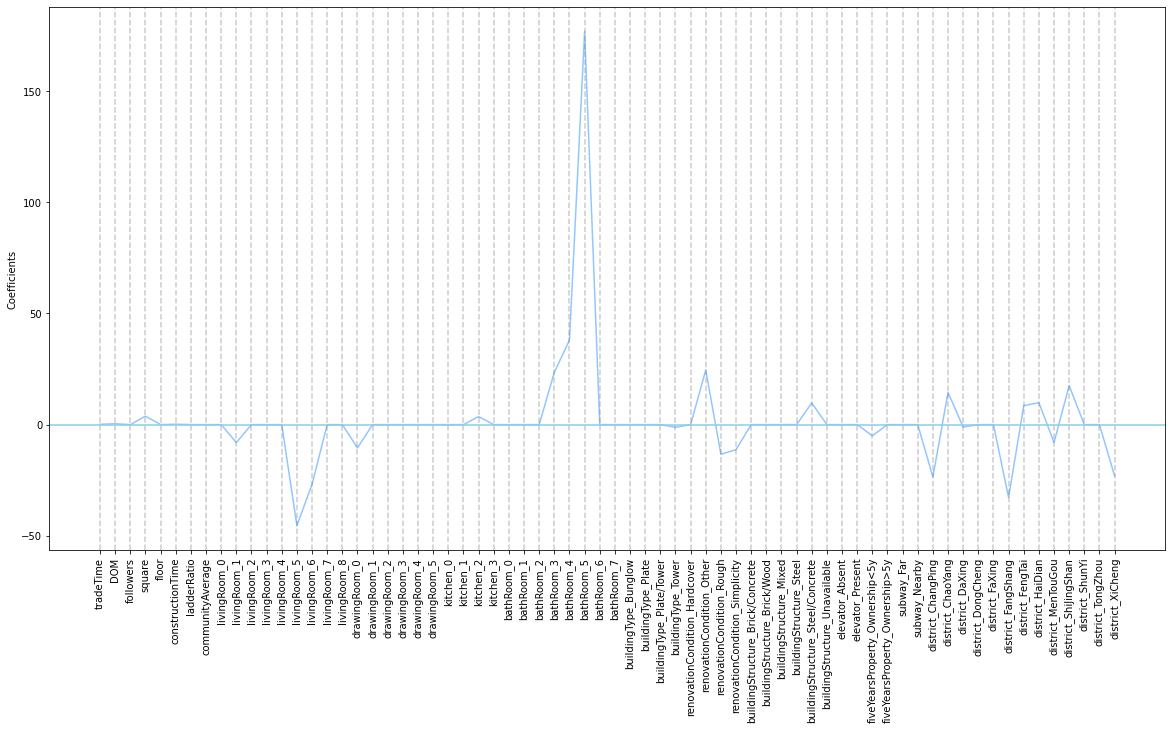

In [45]:
names_coef = [x for x in r_beijing.columns[0:68]]
plt.clf()
plt.figure(figsize=(20,10))
plt.plot(range(len(names_coef)), lasso_coef)
plt.xticks(range(len(names_coef)), names_coef, rotation = 90)
for i in range(0,68):
    plt.axvline(x = i, color = "gray", linestyle='--', alpha = 0.4)
plt.axhline(y = 0, color = "skyblue")
plt.ylabel("Coefficients")
plt.show()

elevator, subway don't seem like a significant features driving the price of houses

In [46]:
s_vars = np.where(abs(lasso_coef)>0)[0].tolist() # significant variables

Important numerical features

In [47]:
for i in s_vars:
    print("{} ".format(names_coef[i],lasso_coef[i]))

tradeTime 
DOM 
square 
constructionTime 
communityAverage 
livingRoom_1 
livingRoom_5 
livingRoom_6 
drawingRoom_0 
kitchen_2 
bathRoom_3 
bathRoom_4 
bathRoom_5 
buildingType_Tower 
renovationCondition_Other 
renovationCondition_Rough 
renovationCondition_Simplicity 
buildingStructure_Steel/Concrete 
fiveYearsProperty_Ownership<5y 
fiveYearsProperty_Ownership>5y 
district_ChangPing 
district_ChaoYang 
district_DaXing 
district_FangShang 
district_FengTai 
district_HaiDian 
district_MenTouGou 
district_ShiJingShan 
district_XiCheng 


In [48]:
s_var_names = ['tradeTime', 'square','communityAverage', 'livingRoom', 'drawingRoom', 'kitchen',
               'bathRoom', 'buildingType', 'renovationCondition', 'buildingStructure',
               'fiveYearsProperty','district']
len(s_var_names)

12

In [49]:
df = beijing.loc[:,s_var_names+['totalPrice']]
df.shape

(297701, 13)

One hot encoding

In [50]:
enc = OneHotEncoder(handle_unknown='ignore', sparse = False)

In [51]:
cat_mask = df.dtypes == object
cat_cols = df.columns[cat_mask].tolist()
cat_cols

['livingRoom',
 'drawingRoom',
 'kitchen',
 'bathRoom',
 'buildingType',
 'renovationCondition',
 'buildingStructure',
 'fiveYearsProperty',
 'district']

In [52]:
enc.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [53]:
encoded_array = enc.transform(df[cat_cols])
encoded_df = pd.DataFrame(encoded_array, columns = enc.get_feature_names(input_features = cat_cols))
print(encoded_df.shape)
encoded_df.head()

(297701, 56)


,livingRoom_0,livingRoom_1,livingRoom_2,livingRoom_3,livingRoom_4,livingRoom_5,livingRoom_6,livingRoom_7,livingRoom_8,drawingRoom_0,...,district_DongCheng,district_FaXing,district_FangShang,district_FengTai,district_HaiDian,district_MenTouGou,district_ShiJingShan,district_ShunYi,district_TongZhou,district_XiCheng
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#df.reset_index(inplace=True, drop=True)
feature_df = df.drop("totalPrice", axis = 1)
feature_df = feature_df.merge(encoded_df, left_index = True, right_index = True).drop(columns = cat_cols, axis=1)
response_df = df["totalPrice"]
df = feature_df.merge(response_df, left_index = True, right_index = True)

In [55]:
df.shape

(297701, 60)

In [56]:
df['tradeTime'] = df['tradeTime'].astype('datetime64[ns]')
df['tradeTime'] = df['tradeTime'].map(dt.datetime.toordinal)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297701 entries, 0 to 297700
Data columns (total 60 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   tradeTime                         297701 non-null  int64  
 1   square                            297701 non-null  float64
 2   communityAverage                  297701 non-null  float64
 3   livingRoom_0                      297701 non-null  float64
 4   livingRoom_1                      297701 non-null  float64
 5   livingRoom_2                      297701 non-null  float64
 6   livingRoom_3                      297701 non-null  float64
 7   livingRoom_4                      297701 non-null  float64
 8   livingRoom_5                      297701 non-null  float64
 9   livingRoom_6                      297701 non-null  float64
 10  livingRoom_7                      297701 non-null  float64
 11  livingRoom_8                      297701 non-null  f

In [58]:
X = df.iloc[:,:59].values
y = df.iloc[:,59].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=193)

### Using regularized ridge regression to fit the model

Plot to identify best alpha

In [60]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [61]:
ridge = Ridge(alpha = 0.1, normalize = True)

In [62]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, normalize=True)

In [63]:
right_pred = ridge.predict(X_test)

In [64]:
ridge.score(X_test, y_test)

0.7723176011219784

In [65]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 5)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

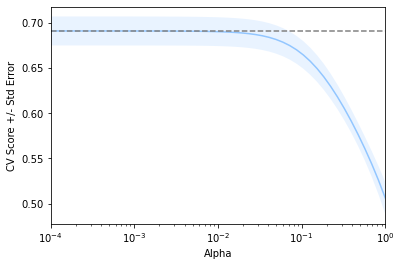

In [66]:
display_plot(ridge_scores, ridge_scores_std)

In [67]:
print("Suggested alpha: {}".format(float(alpha_space[np.where(max(ridge_cv_scores)==ridge_cv_scores)[0]])))

Suggested alpha: 0.00017575106248547912


In [68]:
ridge.alpha =  float(alpha_space[np.where(max(ridge_cv_scores)==ridge_cv_scores)[0]])

In [69]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.00017575106248547912, normalize=True)

In [70]:
right_pred = ridge.predict(X_test)

In [71]:
ridge.score(X_test, y_test)

0.7895376053518249

### Using Ensemble method - GradientBoostingRegressor

In [72]:
model_parameters = {
    'n_estimators': 500,
    'max_depth': 6,
    'min_samples_split': 5,
    
    'learning_rate': 0.01,
    'loss': 'ls'
}
gbReg = GradientBoostingRegressor(**model_parameters)

In [73]:
gbReg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, min_samples_split=5,
                          n_estimators=500)

In [74]:
gbReg.score(X_test, y_test)

0.9455507476115496

## Saving the model

In [75]:
filename = 'models/sklearn_model.sav'
pickle.dump(gbReg, open(filename, 'wb'))

### Loading the model 
Creating a pipeline for price prediction app deployed on Heroku: [house-price-ar32-app](https://house-price-ar32.herokuapp.com/)

In [76]:
mdl = pickle.load(open(filename, 'rb'))
mdl.score(X_test, y_test)

0.9455507476115496

Simulating data

In [77]:
pd.get_dummies(beijing.loc[:,s_var_names])

,tradeTime,square,communityAverage,livingRoom_0,livingRoom_1,livingRoom_2,livingRoom_3,livingRoom_4,livingRoom_5,livingRoom_6,...,district_DongCheng,district_FaXing,district_FangShang,district_FengTai,district_HaiDian,district_MenTouGou,district_ShiJingShan,district_ShunYi,district_TongZhou,district_XiCheng
0,2016-08-09,131.00,56021.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-07-28,132.38,71539.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-12-11,198.00,48160.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-09-30,134.00,51238.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-08-28,81.00,62588.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297696,2016-06-09,134.20,36545.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297697,2016-06-10,170.07,36545.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297698,2016-06-10,35.09,54282.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297699,2016-06-05,102.17,46927.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
beijing.iloc[1,:]

tradeTime              2016-07-28 00:00:00
DOM                                    903
followers                              126
square                              132.38
livingRoom                               2
drawingRoom                              2
kitchen                                  1
bathRoom                                 2
floor                                   22
buildingType                         Tower
constructionTime                      2004
renovationCondition              Hardcover
buildingStructure           Steel/Concrete
ladderRatio                          0.667
elevator                           Present
fiveYearsProperty             Ownership<5y
subway                                 Far
district                          ChaoYang
communityAverage                     71539
totalPrice                             575
Name: 1, dtype: object

In [79]:
df_dict = {
    'tradeTime':'2016-07-28',
    'square':132.38,
    'communityAverage':71539,
    'livingRoom':'2',
    'drawingRoom':'2',
    'kitchen':'1',
    'bathRoom':'2',
    'buildingType':'Tower',
    'renovationCondition':'Hardcover',
    'buildingStructure':'Steel/Concrete',
    'fiveYearsProperty':'Ownership<5y',
    'district':'ChaoYang'
}    
df = pd.DataFrame(df_dict, index = [0])
df.head()

,tradeTime,square,communityAverage,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,fiveYearsProperty,district
0,2016-07-28,132.38,71539,2,2,1,2,Tower,Hardcover,Steel/Concrete,Ownership<5y,ChaoYang


data preprocessing

In [80]:
# datetime column processing
df['tradeTime'] = pd.to_datetime(df['tradeTime'] )
df['tradeTime'] = df['tradeTime'] .map(dt.datetime.toordinal)

# Encoding
cat_cols = ['livingRoom','drawingRoom','kitchen','bathRoom','buildingType','renovationCondition','buildingStructure','fiveYearsProperty','district']
encoded_array = enc.transform(df[cat_cols])
encoded_df = pd.DataFrame(encoded_array, columns = enc.get_feature_names(input_features = cat_cols))
df = pd.concat([df.iloc[:,:11], encoded_df,df.iloc[:,11]], axis=1).drop(columns = cat_cols, axis=1)

# To ndarray
df = df.values
df

array([[7.36173e+05, 1.32380e+02, 7.15390e+04, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]])

In [81]:
mdl.predict(df)

array([729.93494346])